In [ ]:
import numpy as np
import tensorflow as tf

# Step 1: Define the 5x5 input matrix
# The input matrix is a simple 5x5 matrix with values from 1 to 25.
input_matrix = np.array([[1, 2, 3, 4, 5],
                         [6, 7, 8, 9, 10],
                         [11, 12, 13, 14, 15],
                         [16, 17, 18, 19, 20],
                         [21, 22, 23, 24, 25]])

# Step 2: Define the 3x3 kernel
# The kernel is a 3x3 matrix. This kernel is designed to perform edge detection.
kernel = np.array([[1, 0, -1],
                   [1, 0, -1],
                   [1, 0, -1]])

# Reshaping input matrix and kernel for TensorFlow/Keras compatibility
# For TensorFlow's `conv2d` function, the input tensor needs to have shape (batch_size, height, width, channels).
input_tensor = np.expand_dims(input_matrix, axis=0)  # Shape: (1, 5, 5) -- Add batch dimension
input_tensor = np.expand_dims(input_tensor, axis=-1)  # Shape: (1, 5, 5, 1) -- Add channels dimension

# Reshaping the kernel for TensorFlow compatibility
kernel_tensor = np.expand_dims(kernel, axis=-1)  # Shape: (3, 3, 1) -- Add input channels dimension
kernel_tensor = np.expand_dims(kernel_tensor, axis=-1)  # Shape: (3, 3, 1, 1) -- Add output channels dimension

# Convert the tensors to float32
input_tensor = tf.cast(input_tensor, tf.float32) # Cast input tensor to float32
kernel_tensor = tf.cast(kernel_tensor, tf.float32) # Cast kernel tensor to float32

# Step 3: Perform convolution with different configurations

# Stride = 1, Padding = 'VALID'
# 'VALID' padding means no padding, and the output will be smaller than the input.
conv_valid_stride_1 = tf.nn.conv2d(input_tensor, kernel_tensor, strides=[1, 1, 1, 1], padding='VALID')

# Stride = 1, Padding = 'SAME'
# 'SAME' padding adds zero padding so that the output dimensions are the same as the input when stride is 1.
conv_same_stride_1 = tf.nn.conv2d(input_tensor, kernel_tensor, strides=[1, 1, 1, 1], padding='SAME')

# Stride = 2, Padding = 'VALID'
# Stride of 2 skips every other pixel, and 'VALID' padding reduces the output size.
conv_valid_stride_2 = tf.nn.conv2d(input_tensor, kernel_tensor, strides=[1, 2, 2, 1], padding='VALID')

# Stride = 2, Padding = 'SAME'
# With stride 2 and 'SAME' padding, TensorFlow adds padding to maintain an output size compatible with the input size.
conv_same_stride_2 = tf.nn.conv2d(input_tensor, kernel_tensor, strides=[1, 2, 2, 1], padding='SAME')

# Step 4: Print the output feature maps for each case

# Print output for Stride = 1, Padding = 'VALID'
print("Output Feature Map (Stride = 1, Padding = 'VALID'):")
print(conv_valid_stride_1.numpy().squeeze())  # .numpy() converts the result to a NumPy array

# Print output for Stride = 1, Padding = 'SAME'
print("\nOutput Feature Map (Stride = 1, Padding = 'SAME'):")
print(conv_same_stride_1.numpy().squeeze())  # .squeeze() removes single-dimensional entries from the shape

# Print output for Stride = 2, Padding = 'VALID'
print("\nOutput Feature Map (Stride = 2, Padding = 'VALID'):")
print(conv_valid_stride_2.numpy().squeeze())

# Print output for Stride = 2, Padding = 'SAME'
print("\nOutput Feature Map (Stride = 2, Padding = 'SAME'):")
print(conv_same_stride_2.numpy().squeeze())

Output Feature Map (Stride = 1, Padding = 'VALID'):
[[-6. -6. -6.]
 [-6. -6. -6.]
 [-6. -6. -6.]]

Output Feature Map (Stride = 1, Padding = 'SAME'):
[[ -9.  -4.  -4.  -4.  13.]
 [-21.  -6.  -6.  -6.  27.]
 [-36.  -6.  -6.  -6.  42.]
 [-51.  -6.  -6.  -6.  57.]
 [-39.  -4.  -4.  -4.  43.]]

Output Feature Map (Stride = 2, Padding = 'VALID'):
[[-6. -6.]
 [-6. -6.]]

Output Feature Map (Stride = 2, Padding = 'SAME'):
[[ -9.  -4.  13.]
 [-36.  -6.  42.]
 [-39.  -4.  43.]]


'sample_image.jpg' not found. Downloading...
'sample_image.jpg' downloaded successfully.


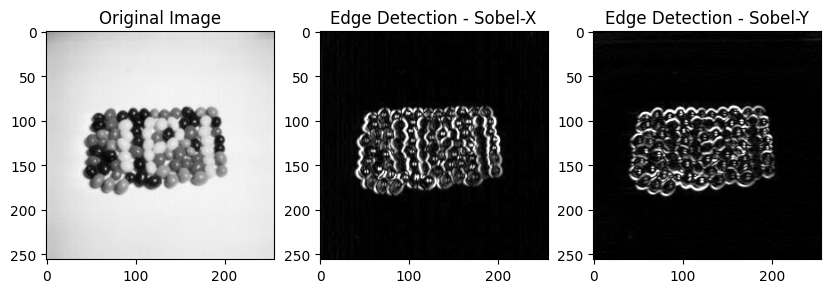

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import urllib.request

# Check if the image exists, if not download it
image_path = 'sample_image.jpg'
if not os.path.exists(image_path):
  print(f"'{image_path}' not found. Downloading...")
  url = "https://upload.wikimedia.org/wikipedia/commons/thumb/b/b6/SIPI_Jelly_Beans_4.1.07.tiff/lossy-page1-256px-SIPI_Jelly_Beans_4.1.07.tiff.jpg"
  try:
    urllib.request.urlretrieve(url, image_path)
    print(f"'{image_path}' downloaded successfully.")
  except Exception as e:
    print(f"Error downloading '{image_path}': {e}")
    exit()
else:
  print(f"'{image_path}' found.")

# Task 1: Implement Edge Detection Using Sobel Filter

# Step 1: Load a grayscale image
# Load the image using OpenCV's imread function. 'sample_image.jpg' should be replaced with the path to your image.
# The image is loaded in grayscale mode (cv2.IMREAD_GRAYSCALE).
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Step 2: Apply Sobel filter for edge detection in the x-direction (Sobel-X)
# Sobel filter is applied to the image to detect horizontal edges. dx=1 and dy=0 indicates Sobel-X.
# ksize=3 specifies the size of the kernel (3x3 in this case).
sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)

# Step 3: Apply Sobel filter for edge detection in the y-direction (Sobel-Y)
# Sobel filter is applied to the image to detect vertical edges. dx=0 and dy=1 indicates Sobel-Y.
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)

# Step 4: Convert the Sobel filtered images to uint8 for display purposes
# Sobel results may contain negative values, so we use convertScaleAbs to convert the result to absolute values.
# This converts the result to an unsigned 8-bit integer (uint8) format for display.
sobel_x = cv2.convertScaleAbs(sobel_x)
sobel_y = cv2.convertScaleAbs(sobel_y)

# Step 5: Display the original and Sobel-filtered images using matplotlib
# The 'imshow' function of matplotlib displays the image. We use 'cmap="gray"' to show the image in grayscale.
plt.figure(figsize=(10, 7))

# Displaying the original image
plt.subplot(1, 3, 1), plt.imshow(image, cmap='gray'), plt.title('Original Image')

# Displaying the edge-detected image in the x-direction (Sobel-X)
plt.subplot(1, 3, 2), plt.imshow(sobel_x, cmap='gray'), plt.title('Edge Detection - Sobel-X')

# Displaying the edge-detected image in the y-direction (Sobel-Y)
plt.subplot(1, 3, 3), plt.imshow(sobel_y, cmap='gray'), plt.title('Edge Detection - Sobel-Y')

# Show the images
plt.show()

In [ ]:
import tensorflow as tf
import numpy as np

# Task 2: Implement Max Pooling and Average Pooling

# Step 1: Create a random 4x4 matrix (input image)
# This matrix is a 4x4 matrix with random float values.
input_matrix = np.array([[1, 2, 3, 4],
                         [5, 6, 7, 8],
                         [9, 10, 11, 12],
                         [13, 14, 15, 16]], dtype=np.float32)

# Step 2: Apply 2x2 Max Pooling
# MaxPooling2D performs max pooling over 2x2 regions with a stride of 2.
max_pooling = tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid')

# Apply MaxPooling to the input matrix, adding batch and channel dimensions
max_pooled_output = max_pooling(np.expand_dims(np.expand_dims(input_matrix, axis=0), axis=-1))

# Step 3: Apply 2x2 Average Pooling
# AveragePooling2D performs average pooling over 2x2 regions with a stride of 2.
average_pooling = tf.keras.layers.AveragePooling2D(pool_size=(2, 2), strides=2, padding='valid')

# Apply AveragePooling to the input matrix, adding batch and channel dimensions
avg_pooled_output = average_pooling(np.expand_dims(np.expand_dims(input_matrix, axis=0), axis=-1))

# Step 4: Print the results
# Print the original matrix, the max-pooled output, and the average-pooled output.
print("Original Matrix:")
print(input_matrix)

print("\nMax Pooled Matrix (2x2 Pooling):")
# .numpy() converts the tensor to a NumPy array and .squeeze() removes unnecessary dimensions.
print(max_pooled_output.numpy().squeeze())

print("\nAverage Pooled Matrix (2x2 Pooling):")
print(avg_pooled_output.numpy().squeeze())


Original Matrix:
[[ 1.  2.  3.  4.]
 [ 5.  6.  7.  8.]
 [ 9. 10. 11. 12.]
 [13. 14. 15. 16.]]

Max Pooled Matrix (2x2 Pooling):
[[ 6.  8.]
 [14. 16.]]

Average Pooled Matrix (2x2 Pooling):
[[ 3.5  5.5]
 [11.5 13.5]]


In [6]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Task 1: Implement AlexNet Architecture

def build_alexnet():
    model = models.Sequential()

    # Conv2D Layer: 96 filters, kernel size = (11,11), stride = 4, activation = ReLU
    model.add(layers.Conv2D(96, (11, 11), strides=4, activation='relu', input_shape=(227, 227, 3)))

    # MaxPooling Layer: pool size = (3,3), stride = 2
    model.add(layers.MaxPooling2D(pool_size=(3, 3), strides=2))

    # Conv2D Layer: 256 filters, kernel size = (5,5), activation = ReLU
    model.add(layers.Conv2D(256, (5, 5), activation='relu'))

    # MaxPooling Layer: pool size = (3,3), stride = 2
    model.add(layers.MaxPooling2D(pool_size=(3, 3), strides=2))

    # Conv2D Layer: 384 filters, kernel size = (3,3), activation = ReLU
    model.add(layers.Conv2D(384, (3, 3), activation='relu'))

    # Conv2D Layer: 384 filters, kernel size = (3,3), activation = ReLU
    model.add(layers.Conv2D(384, (3, 3), activation='relu'))

    # Conv2D Layer: 256 filters, kernel size = (3,3), activation = ReLU
    model.add(layers.Conv2D(256, (3, 3), activation='relu'))

    # MaxPooling Layer: pool size = (3,3), stride = 2
    model.add(layers.MaxPooling2D(pool_size=(3, 3), strides=2))

    # Flatten Layer
    model.add(layers.Flatten())

    # Fully Connected (Dense) Layer: 4096 neurons, activation = ReLU
    model.add(layers.Dense(4096, activation='relu'))

    # Dropout Layer: 50%
    model.add(layers.Dropout(0.5))

    # Fully Connected (Dense) Layer: 4096 neurons, activation = ReLU
    model.add(layers.Dense(4096, activation='relu'))

    # Dropout Layer: 50%
    model.add(layers.Dropout(0.5))

    # Output Layer: 10 neurons, activation = Softmax
    model.add(layers.Dense(10, activation='softmax'))

    # Return the model
    return model

# Build and compile the AlexNet model
alexnet_model = build_alexnet()
alexnet_model.summary()  # Display model summary


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 55, 55, 96)          │          34,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 27, 27, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 23, 23, 256)         │         614,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 11, 11, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 9, 9, 384)           │         885,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 7, 7, 384)           │       1,327,488 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 5, 5, 256)           │         884,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 2, 2, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 4096)                │       4,198,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4096)                │      16,781,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │          40,970 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,767,882 (94.48 MB)

 Trainable params: 24,767,882 (94.48 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
# Task 2: Implement Residual Block and ResNet-like Model

def residual_block(input_tensor, filters):
    """
    Implementing a residual block with two Conv2D layers
    and a skip connection that adds the input to the output before activation.
    """
    # First Conv2D layer with ReLU activation
    x = layers.Conv2D(filters, (3, 3), activation='relu', padding='same')(input_tensor)

    # Second Conv2D layer with ReLU activation
    x = layers.Conv2D(filters, (3, 3), activation='relu', padding='same')(x)

    # Skip connection: Add the input tensor to the output of the second Conv2D
    x = layers.add([x, input_tensor])

    return x

def build_resnet():
    """
    Build a simple ResNet-like model using residual blocks.
    """
    input_tensor = layers.Input(shape=(224, 224, 3))  # Input layer

    # Initial Conv2D Layer
    x = layers.Conv2D(64, (7, 7), strides=2, activation='relu', padding='same')(input_tensor)

    # First Residual Block
    x = residual_block(x, 64)

    # Second Residual Block
    x = residual_block(x, 64)

    # Flatten Layer
    x = layers.Flatten()(x)

    # Dense Layer: 128 neurons
    x = layers.Dense(128, activation='relu')(x)

    # Output Layer: Softmax activation for classification
    output_tensor = layers.Dense(10, activation='softmax')(x)

    # Create the model
    model = models.Model(inputs=input_tensor, outputs=output_tensor)

    return model

# Build and compile the ResNet-like model
resnet_model = build_resnet()
resnet_model.summary()  # Display model summary


Model: "functional_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_5 (Conv2D)         │ (None, 112, 112, 64)   │          9,472 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_6 (Conv2D)         │ (None, 112, 112, 64)   │         36,928 │ conv2d_5[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_7 (Conv2D)         │ (None, 112, 112, 64)   │         36,928 │ conv2d_6[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add (Add)                 │ (None, 112, 112, 64)   │              0 │ conv2d_7[0][0],        │
│                           │                        │                │ conv2d_5[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_8 (Conv2D)         │ (None, 112, 112, 64)   │         36,928 │ add[0][0]              │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_9 (Conv2D)         │ (None, 112, 112, 64)   │         36,928 │ conv2d_8[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_1 (Add)               │ (None, 112, 112, 64)   │              0 │ conv2d_9[0][0],        │
│                           │                        │                │ add[0][0]              │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_1 (Flatten)       │ (None, 802816)         │              0 │ add_1[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_3 (Dense)           │ (None, 128)            │    102,760,576 │ flatten_1[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_4 (Dense)           │ (None, 10)             │          1,290 │ dense_3[0][0]          │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 102,919,050 (392.61 MB)

 Trainable params: 102,919,050 (392.61 MB)

 Non-trainable params: 0 (0.00 B)